/home/hung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


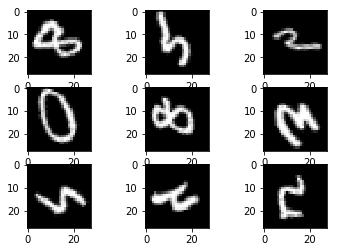

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
% matplotlib inline
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')

# define data preparation
datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=180,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [3]:
# define data preparation
datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=180,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
input_shape = (100,100)
batch_size = 20
train_dir= '../Session-4/gesture_data/train'
generator_train = datagen.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

Found 1080 images belonging to 6 classes.
